In [21]:
### Common imports
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math
### Custom functions
from src.rbm import RBM
from src.dbn import DBN
from src.dnn import DNN
from src.data import get_mnist

In [22]:
X_train, X_test, y_train, y_test = get_mnist()

### DNN Programme

In [23]:
cfg_train = {
    "n_epoches":50,
    "lr":0.1,
    "batch_size":512,
    "shuffle":True
}

cfg_dnn = {
    "channels":[784, 64],
    "n_classes":10
}

In [24]:
dnn = DNN(**cfg_dnn)

In [ ]:
losses_pre = dnn.train_DBN(X_train, **cfg_train)
losses_class = dnn.backprop(X_train, y_train, **cfg_train)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(4, 8))
ax1 = axs[0]
ax1.plt(losses_pre)
ax1.set_title("MSE Error for pre-training")

ax2 = axs[1]
ax2.plt(losses_class)
ax2.set_title("Cross entropy error")

plt.show()

### Check labels 

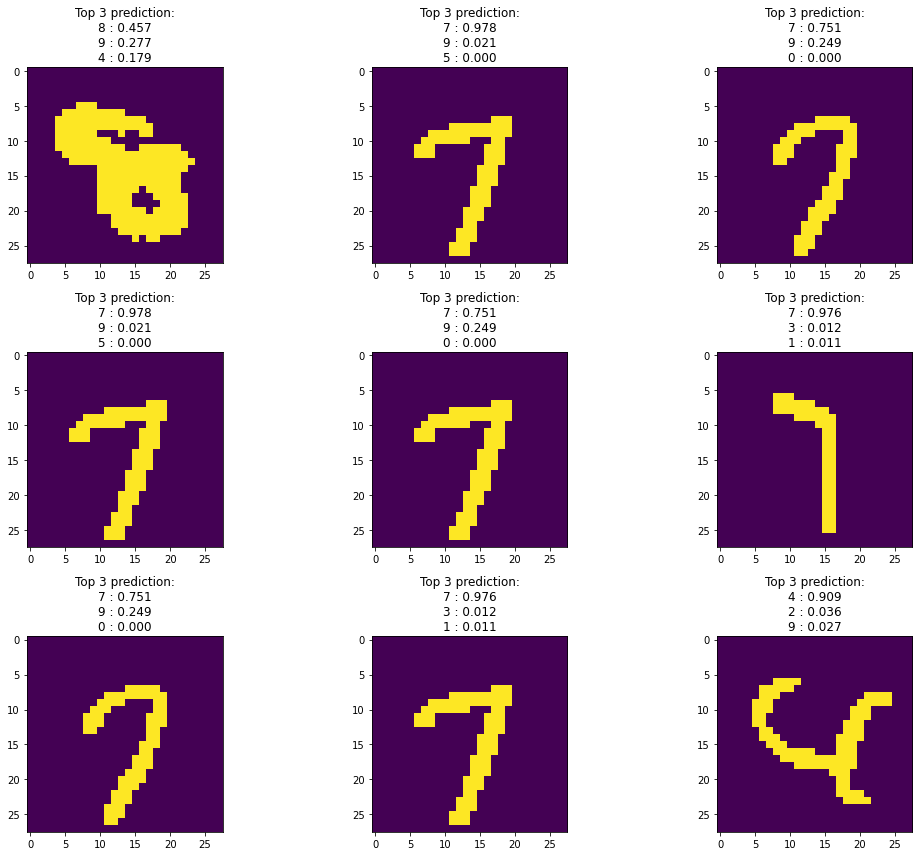

In [31]:
idxes = np.random.choice(np.arange(X_test.shape[0]), 9)
y_pred = dnn.forward(X_test[idxes])[0]
idx_pred = np.argsort(y_pred, axis=1)[:, ::-1]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 12))
for i in range(3):
    axs[i, 0].imshow(X_test[idxes[i]].reshape(28, 28))
    axs[i, 0].set_title(\
    "Top 3 prediction:\n{} : {:.3f}\n{} : {:.3f}\n{} : {:.3f}".format(
        idx_pred[i][0], y_pred[i][idx_pred[i][0]],
        idx_pred[i][1], y_pred[i][idx_pred[i][1]],
        idx_pred[i][2], y_pred[i][idx_pred[i][2]]
        )
    )

    axs[i, 1].imshow(X_test[idxes[+1]].reshape(28, 28))
    axs[i, 1].set_title(\
    "Top 3 prediction:\n{} : {:.3f}\n{} : {:.3f}\n{} : {:.3f}".format(
        idx_pred[i+1][0], y_pred[i+1][idx_pred[i+1][0]],
        idx_pred[i+1][1], y_pred[i+1][idx_pred[i+1][1]],
        idx_pred[i+1][2], y_pred[i+1][idx_pred[i+1][2]]
        )
    )

    axs[i, 2].imshow(X_test[idxes[i+2]].reshape(28, 28))
    axs[i, 2].set_title(\
    "Top 3 prediction:\n{} : {:.3f}\n{} : {:.3f}\n{} : {:.3f}".format(
        idx_pred[i+2][0], y_pred[i+2][idx_pred[i+2][0]],
        idx_pred[i+2][1], y_pred[i+2][idx_pred[i+2][1]],
        idx_pred[i+2][2], y_pred[i+2][idx_pred[i+2][2]]
        )
    )

plt.tight_layout()
plt.show()

* Fig 1 : 2 courbes exprimant le taux d’erreur des 2 réseaux en fonction du nombre de couches (par exemple 2 couches de 200, puis 3 couches de 200, ... puis 5 couches de 200). On utilisera toutes les données d’apprentissage et test;
* Fig 2 : 2 courbes exprimant le taux d’erreur des 2 réseaux en fonction du nombre de neurones par couches (par exemple 2 couches de 100, puis 2 couches de 300, ...puis 2 couches de 700,...). on utilisera toutes les données d’apprentissage et test;
* Fig 3 : 2 courbes exprimant le taux d’erreur des 2 réseaux en fonction du nombre de données train (par exemple on fixe 2 couches de 200 puis on utilise 1000 données train, 3000, 7000, 10000, 30000, 60000).

### Grid Search
#### Number of layers

In [47]:
layers = [
    {"channels":[784, 50], "n_classes":10},
    {"channels":[784, 50, 50], "n_classes":10},
    {"channels":[784, 50, 50, 50], "n_classes":10},
    {"channels":[784, 50, 50, 50, 50], "n_classes":10},
]

losses_layers_train = {
    
}

losses_layers_test = {
    
}

In [48]:
n_epoches = 50
lr = 0.1
batch_size = 512


for cfg_layer in layers:
    n_layers = len(cfg_layer["channels"])
    print("Number of layers {}".format(n_layers))
    dnn = DNN(**cfg_layer)

    size = X_train.shape[0]
    size_test = X_test.shape[0]
    losses_tmp_train = []
    losses_tmp_test = []

    idxes = np.arange(size)
    np.random.shuffle(idxes)
    idxes_test = np.arange(size_test)
    np.random.shuffle(idxes)

    for _ in (pbar := tqdm(range(n_epoches))):
        err = 0.
        n_elem = 0
        for i in range(math.ceil(size/batch_size)):
            X_batch = X_train[idxes[i*batch_size:(i+1)*batch_size]]
            y_batch = y_train[idxes[i*batch_size:(i+1)*batch_size]]
            dnn.backprop_batch(X_batch, y_batch, lr)

        losses_tmp_train.append(dnn.eval(X_train, y_train)/size)
        losses_tmp_test.append(dnn.eval(X_test, y_test)/size_test)
        pbar.set_description("Train {:.3f}, Test {:.3f}".format(losses_tmp_train[-1], losses_tmp_test[-1]))
        
    losses_layers_train[n_layers] = losses_tmp_train
    losses_layers_test[n_layers] = losses_tmp_test

Number of layers 2


  0%|          | 0/50 [00:00<?, ?it/s]

Number of layers 3


  0%|          | 0/50 [00:00<?, ?it/s]

Number of layers 4


  0%|          | 0/50 [00:00<?, ?it/s]

Number of layers 5


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
del losses_layers_test[50]

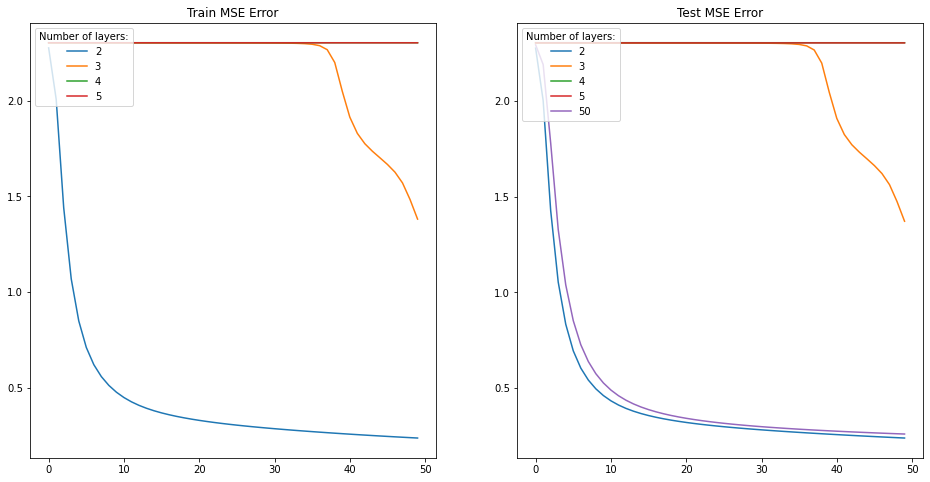

In [59]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
ax1 = axs[0]
for key, item in losses_layers_train.items():
    ax1.plot(item, label=str(key))
ax1.legend(loc='upper left', title = "Number of layers:")
ax1.set_title("Train MSE Error")

ax2 = axs[1]
for key, item in losses_layers_test.items():
    ax2.plot(item, label=str(key))
ax2.legend(loc='upper left', title = "Number of layers:")
ax2.set_title("Test MSE Error")

plt.show()

#### Layer size

In [60]:
width = [
    {"channels":[784, 10], "n_classes":10},
    {"channels":[784, 20], "n_classes":10},
    {"channels":[784, 40], "n_classes":10},
    {"channels":[784, 80], "n_classes":10},
    {"channels":[784, 160], "n_classes":10},
    {"channels":[784, 320], "n_classes":10},
]

losses_width_train = {}
losses_width_test = {}

In [61]:
n_epoches = 50
lr = 0.1
batch_size = 512


for cfg_width in width:
    n_neur = cfg_width["channels"][1]
    print("Width of Hidden Layer {}".format(n_neur))
    dnn = DNN(**cfg_width)

    size = X_train.shape[0]
    size_test = X_test.shape[0]
    losses_tmp_train = []
    losses_tmp_test = []

    idxes = np.arange(size)
    np.random.shuffle(idxes)
    idxes_test = np.arange(size_test)
    np.random.shuffle(idxes)

    for _ in (pbar := tqdm(range(n_epoches))):
        err = 0.
        n_elem = 0
        for i in range(math.ceil(size/batch_size)):
            X_batch = X_train[idxes[i*batch_size:(i+1)*batch_size]]
            y_batch = y_train[idxes[i*batch_size:(i+1)*batch_size]]
            dnn.backprop_batch(X_batch, y_batch, lr)

        losses_tmp_train.append(dnn.eval(X_train, y_train)/size)
        losses_tmp_test.append(dnn.eval(X_test, y_test)/size_test)
        pbar.set_description("Train {:.3f}, Test {:.3f}".format(losses_tmp_train[-1], losses_tmp_test[-1]))
        
    losses_width_train[n_neur] = losses_tmp_train
    losses_width_test[n_neur] = losses_tmp_test

Width of Hidden Layer 10


  0%|          | 0/50 [00:00<?, ?it/s]

Width of Hidden Layer 20


  0%|          | 0/50 [00:00<?, ?it/s]

Width of Hidden Layer 40


  0%|          | 0/50 [00:00<?, ?it/s]

Width of Hidden Layer 80


  0%|          | 0/50 [00:00<?, ?it/s]

Width of Hidden Layer 160


  0%|          | 0/50 [00:00<?, ?it/s]

Width of Hidden Layer 320


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

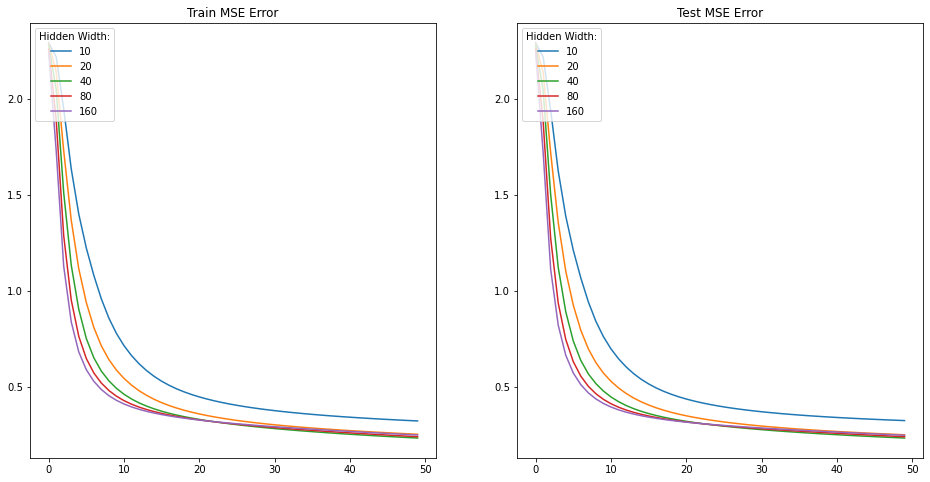

In [62]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
ax1 = axs[0]
for key, item in losses_width_train.items():
    ax1.plot(item, label=str(key))
ax1.legend(loc='upper left', title = "Hidden Width:")
ax1.set_title("Train MSE Error")

ax2 = axs[1]
for key, item in losses_width_test.items():
    ax2.plot(item, label=str(key))
ax2.legend(loc='upper left', title = "Hidden Width:")
ax2.set_title("Test MSE Error")

plt.show()

#### Data size

In [83]:
train_size = [1000, 3000, 7000, 10000, 30000, 60000]
cfg_dnn = {"channels":[784, 40], "n_classes":10}
    
losses_size_train = {}
losses_size_test = {}

In [84]:
n_epoches = 100
lr = 0.1
batch_size = 512
idxes_full = np.arange(X_train.shape[0])
np.random.shuffle(idxes_full)
idxes_test = np.arange(size_test)
np.random.shuffle(idxes_full)

for n_size in train_size:
    print("Train size {}".format(n_size))
    dnn = DNN(**cfg_dnn)

    size = n_size
    size_test = X_test.shape[0]
    losses_tmp_train = []
    losses_tmp_test = []
    idxes = idxes_full[:n_size]
    
    for _ in (pbar := tqdm(range(n_epoches))):
        err = 0.
        n_elem = 0
        for i in range(math.ceil(size/batch_size)):
            X_batch = X_train[idxes[i*batch_size:(i+1)*batch_size]]
            y_batch = y_train[idxes[i*batch_size:(i+1)*batch_size]]
            dnn.backprop_batch(X_batch, y_batch, lr)

        losses_tmp_train.append(dnn.eval(X_train[idxes], y_train[idxes])/size)
        losses_tmp_test.append(dnn.eval(X_test, y_test)/size_test)
        pbar.set_description("Train {:.3f}, Test {:.3f}".format(losses_tmp_train[-1], losses_tmp_test[-1]))
        
    losses_size_train[n_size] = losses_tmp_train
    losses_size_test[n_size] = losses_tmp_test

Train size 1000


  0%|          | 0/100 [00:00<?, ?it/s]

Train size 3000


  0%|          | 0/100 [00:00<?, ?it/s]

Train size 7000


  0%|          | 0/100 [00:00<?, ?it/s]

Train size 10000


  0%|          | 0/100 [00:00<?, ?it/s]

Train size 30000


  0%|          | 0/100 [00:00<?, ?it/s]

Train size 60000


  0%|          | 0/100 [00:00<?, ?it/s]

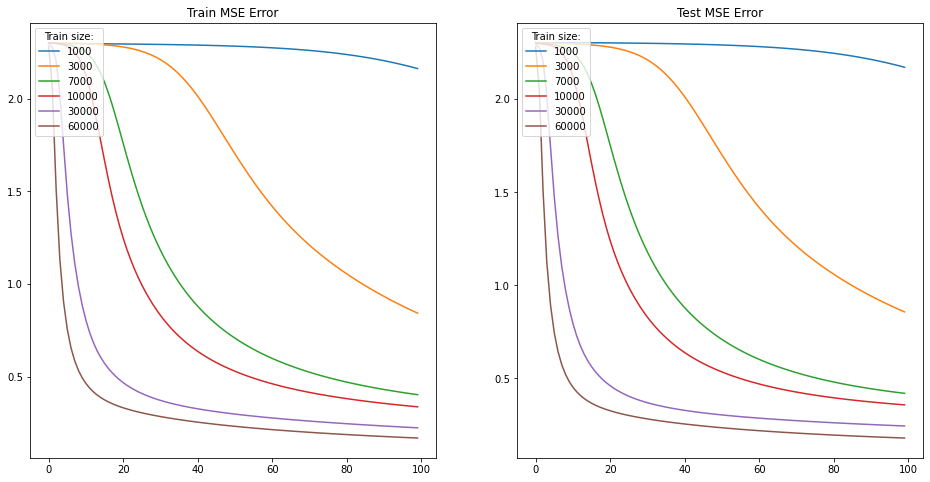

In [85]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
ax1 = axs[0]
for key, item in losses_size_train.items():
    ax1.plot(item, label=str(key))
ax1.legend(loc='upper left', title = "Train size:")
ax1.set_title("Train MSE Error")

ax2 = axs[1]
for key, item in losses_size_test.items():
    ax2.plot(item, label=str(key))
ax2.legend(loc='upper left', title = "Train size:")
ax2.set_title("Test MSE Error")

plt.show()